In [1]:
# Importing all the essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Importing Stock market data from the Internet

# Importing Stock market data from the Internet

from pandas_datareader import data as pdr
import yfinance as yf

# Fetch stock data for Tesla (TSLA)
df = yf.download('TSLA', start='2022-01-01', end='2022-12-31')
print(df.head())


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

               Volume  
Date                   
2022-01-03  103931400  
2022-01-04  100248300  
2022-01-05   80119800  
2022-01-06   90336600  
2022-01-07   84164700  


In [3]:
# Importing datetime for setting start and end date of the stock market dataset

from datetime import datetime

In [4]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
# Importing Google Stock Prices

TSLA = yf.download('TSLA', start=start, end=end)
print(TSLA.head())

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-11  264.269989  274.850006  260.609985  273.579987  273.579987   
2023-09-12  270.760010  278.390015  266.600006  267.480011  267.480011   
2023-09-13  270.070007  274.980011  268.100006  271.299988  271.299988   
2023-09-14  271.320007  276.709991  270.420013  276.040009  276.040009   
2023-09-15  277.549988  278.980011  271.000000  274.390015  274.390015   

               Volume  
Date                   
2023-09-11  174667900  
2023-09-12  135999900  
2023-09-13  111673700  
2023-09-14  107709800  
2023-09-15  133422800  


In [6]:
# Some Basic info about the Tesla motors Stock

TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,210.369091,214.640949,206.133524,210.323360,210.323360,1.039587e+08
std,32.207494,32.806526,31.579932,32.159662,32.159662,3.049997e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,2.282876e+07
25%,182.000000,184.589996,177.000000,180.009995,180.009995,8.203820e+07
50%,210.029999,214.889999,205.779999,209.139999,209.139999,1.032214e+08
75%,238.550003,244.009995,234.250000,239.289993,239.289993,1.210826e+08
max,277.549988,278.980011,271.000000,276.040009,276.040009,2.438697e+08


<Axes: xlabel='Date'>

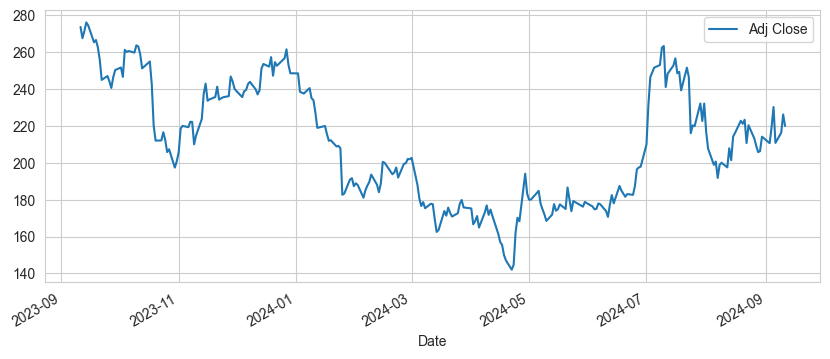

In [7]:
# Plotting Adjusted Closing price for Tesla Motors Stock

TSLA['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

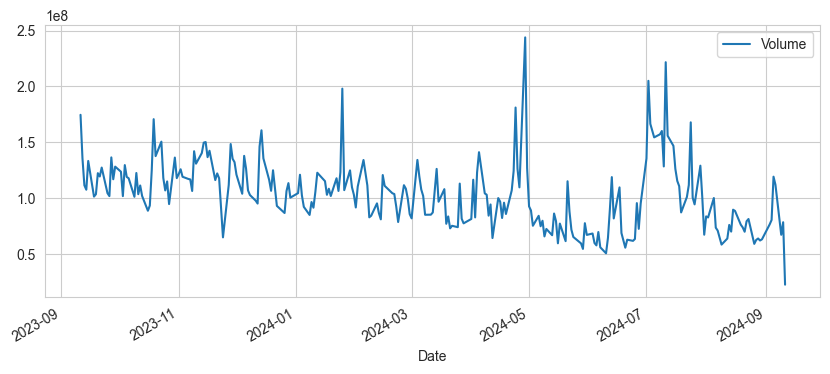

In [8]:
# Plotting the total volume of stock being traded each day

TSLA['Volume'].plot(legend=True,figsize=(10,4))

In [10]:
# Calculating Moving average for 10, 20 and 50 days of the stock price


# Define moving average days
ma_day = [10, 20, 50]

# Calculate moving averages
for ma in ma_day:
    column_name = f"MA for {ma} days"
    TSLA[column_name] = TSLA['Adj Close'].rolling(window=ma).mean()

<Axes: xlabel='Date'>

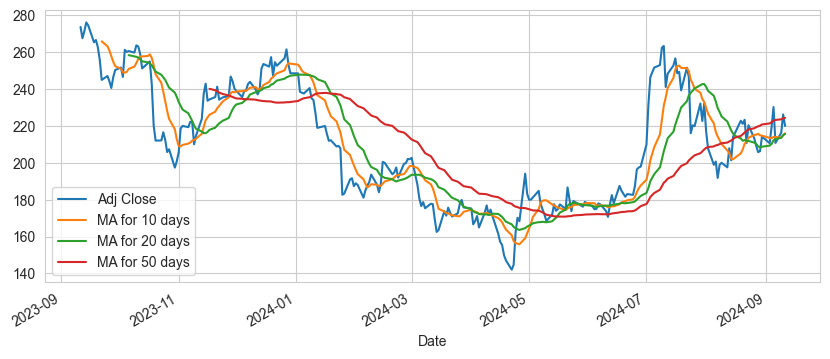

In [11]:
# Plotting the moving averages

TSLA[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<Axes: xlabel='Date'>

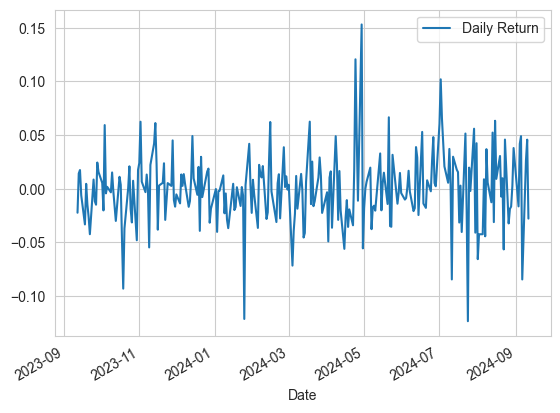

In [12]:
# Plotting Daily returns as a function of Percent change in Adjusted Close value

TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()

TSLA['Daily Return'].plot(legend=True)

C:\Users\princ\AppData\Local\Temp\ipykernel_22016\158006501.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TSLA['Daily Return'].dropna(),bins=100)


<Axes: xlabel='Daily Return', ylabel='Density'>

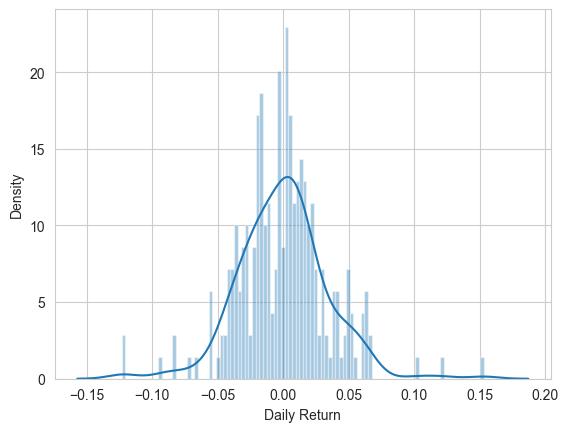

In [13]:
# Plotting the average daily returns of the stock

sns.distplot(TSLA['Daily Return'].dropna(),bins=100)

Text(0, 0.5, 'Risk')

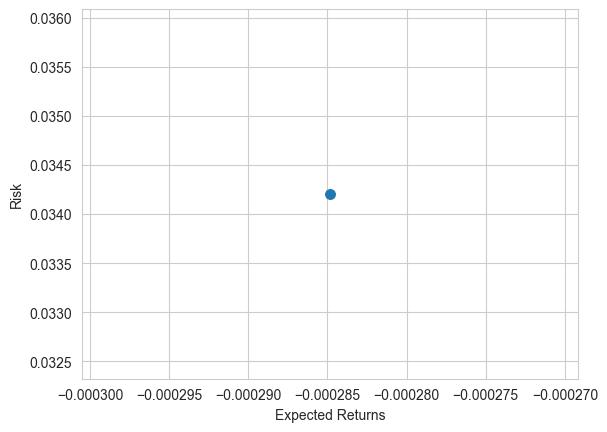

In [14]:
# Risk Analysis --  Comparing the Risk vs Expected returns

rets = TSLA['Daily Return'].dropna()

area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

C:\Users\princ\AppData\Local\Temp\ipykernel_22016\2281168612.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TSLA['Daily Return'].dropna(),bins=100)


<Axes: xlabel='Daily Return', ylabel='Density'>

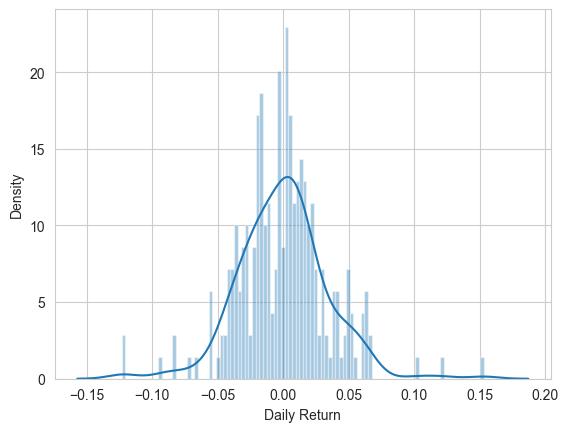

In [15]:
# Visualizing the Value at Risk

sns.distplot(TSLA['Daily Return'].dropna(),bins=100)

In [16]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

TSLA['Daily Return'].quantile(0.05)

-0.04784192665069822

In [17]:
## Monte Carlo Simulation

days = 365

dt = 1/days

mu = rets.mean()

sigma = rets.std()

In [18]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [19]:
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2023-09-11,264.269989,274.850006,260.609985,273.579987,273.579987,174667900,NaN,NaN,NaN,NaN
2023-09-12,270.760010,278.390015,266.600006,267.480011,267.480011,135999900,NaN,NaN,NaN,-0.022297
2023-09-13,270.070007,274.980011,268.100006,271.299988,271.299988,111673700,NaN,NaN,NaN,0.014281
2023-09-14,271.320007,276.709991,270.420013,276.040009,276.040009,107709800,NaN,NaN,NaN,0.017472
2023-09-15,277.549988,278.980011,271.000000,274.390015,274.390015,133422800,NaN,NaN,NaN,-0.005977


Text(0.5, 1.0, 'Monte Carlo Simulation for Tesla Motors')

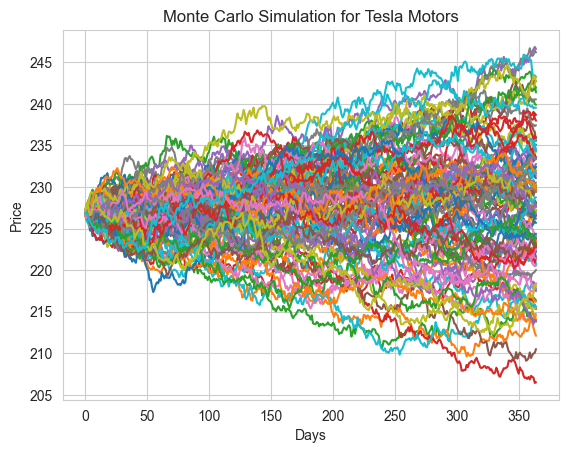

In [20]:
# Running the Monte Carlo simulation a hundred times

start_price = 226.899994

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Tesla Motors')

In [21]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

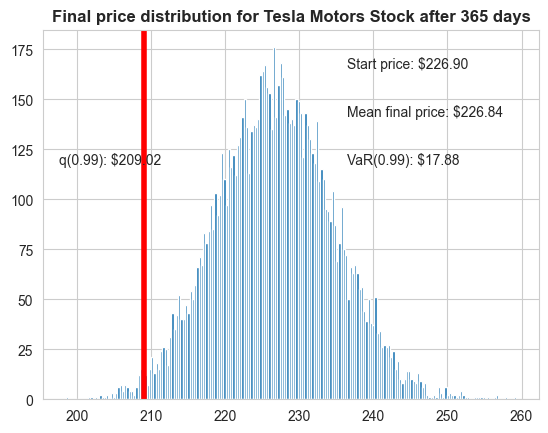

In [22]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Tesla Motors Stock after %s days" % days, weight='bold');